### Miniproyecto 2 - Fisica Estadistica
* Realizado por: Sergio Duque Mejía

En este miniproyecto se estudia el modelo cuantico de Heisenberg para materiales magneticos, es decir que se considera un eje coordenado que se encuentra cuantizado por el numero cuantico m tal que $\nu(m) = 2J+1$ por lo que $m = -J,-J+1,-J+2,...,J-1,J$, en este proyecto el eje cuantizado es el $Z$, ademas los ejes $X$ y $Y$ tienen un dominio determinado por la simetria del sistema esferico tal que $\theta \epsilon [0,360]$ y $\phi \epsilon [0,180]$. El hamiltoniano que describe la dinamica del sistema es:

\begin{equation}
    H = -J \sum_{<i,j>} \vec{\mu_{i}} \cdot \vec{\mu_{j}} - \sum_{i=1}^{N} \vec{\mu_{i}} \cdot \vec{H}
\end{equation}

Donde $\vec{\mu_{i}}$ es el momento dipolar magnetico que se se estudia, $\vec{\mu_{j}}$ es la suma de los momentos dipolares magneticos vecinos al estudiado, $J$ es un parametro de intercambio que mide la intencidad del acople entre momentos dipolares magneticos y $H$ es el campo magnetico externo al sistema que se considera uniforme y en direccion al eje $+Z$. Por lo que el sistema describe dos terminos que seran analizados en el presente trabajo, el primer termino que se llama Termino de intercambio que mide la energia basada en la interaccion entre parejas de momentos magneticos y el segundo termino llamado Interaccion de Zeemann que mide la energia producto de la interacion entre momentos dipolares magneticos y el campo magnetico externo.

Para realizar este analisis se utiliza el metodo de Montecarlo basado en cadenas de Markov, el cual permite evolucionar el sistema teniendo en cuenta las condiciones previas del paso de montecarlo, los criterios de evolucion estan determinados por la energia del sistema por sitio y por un factor de probabilidad de transicion.

Parametros para el analisis:
* L = Longitud de cara del cubo.
* N = Numero de momentos dipolares magneticos alojados en el cubo. Se define como $N = L^{3}$
* MCSmax = numero maximo de pasos de montecarlo.
* x = numero cuantico principal de momento angular total, en este trabajo se tomaran $x = {\frac{1}{2},\frac{3}{2},\frac{5}{2}}$.
* J = parametro de intercambio.

En el presente trabajo se realizo 4 analisis:
* Analisis de $\frac{<Mz>}{NJ}$ vs $H$ para cada valor de x, con $H \epsilon [-100,100]$ Tesla
* Analisis de $\frac{<Mz>}{NJ}$ vs $H/T$ para cada valor de x, con $H \epsilon [-100,100]$ Tesla
* Analisis de transiciones de fase: $\frac{<Mz>}{NJ}$ vs $T$ para cada valor de x, teniendo $T \epsilon [0.01,25]$ Kelvin
* Analisis de formacion de Histeresis: $\frac{<Mz>}{NJ}$ vs $H$ cuando T es constante, $H \neq 0$

In [146]:
# Librerias que utiliza la simulacion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [147]:
def m_numbers(J): return np.arange(-J,J+1) # numero cuantico m, m = -J,-J+1,-J+2,...,J-1,J
def vertice(L): return [ i+0.5 for i in range(0,L) ] # vertice donde se construye los momentos dipolares magneticos dentro del cubo de lado n

In [148]:
def inicialState(L,x,type):
    '''
    Funcion que construye el estado inicial de momentos dipolares magneticos dentro del cubo.
    L = Tamaño de lado del cubo.
    x = numero cuantico principal de momento angular total.
    type = tipo de estado inicial, si type = 'random' entonces la componente Z de cada vector sera tomada de forma aleatoria
           si type = 'up' entonces la componente Z de cada vector apunta en direccion al valor mas positivo de los valores del numero cuantico m.
           si type = 'down' entonces la componente Z de cada vector apunta en direccion al valor mas negativo de los valores del numero cuantico m.
    '''
    m = m_numbers(x) # genera los valores del numero cuantico m
    C = np.zeros((L,L,L)).tolist() # construye el cubo con ceros
    
    # comienza el bucle que recorre el cubo:
    for i in range(L):
        for j in range(L):
            for k in range(L):
                if type == 'random': # tipo random
                    rand3 = np.random.choice(m)
                elif type == 'up': # tipo up
                    rand3 = max(m)
                elif type == 'down': # tipo down
                    rand3 = min(m)
                phi = np.random.randint(0,360) * np.pi/180 # valor de angulo eta en radianes
                theta = np.random.randint(0,180) * np.pi/180 # valor de angulo theta en radianes
                V = np.array([[np.cos(phi)*np.sin(theta),  
                               np.sin(phi)*np.sin(theta),
                               rand3]]) # Se construye el vector tal que tome todos los valores de los ejes X y Y, pero esta cuantizado en Z.
                C[i][j][k] = V[0].tolist() # Se almacena los vectores dentro de cada componente del cubo.
                continue
    return np.flip(C,axis=0).tolist() # Como se construye de abajo hacia arriba en la lista, se invierte para construirlo de arriba a abajo. retorna la configuracion.

In [149]:
def graphState(config,x):
    '''
    Funcion que permite graficar cualquier estado generado.
    config = configuracion que se desee graficar.
    x = numero cuantico principal de momento angular total.
    '''
    L = len(config) # toma el tamaño de L
    fig = plt.figure(figsize=(10,8),constrained_layout=True) # crea la figura
    ax = fig.add_subplot(111, projection='3d') # crea la proyeccion en 3D
    ax.set_title(f"Caja 3D con tamaño L = {L}, x = {x}") # Pone titulo

    if x == 1/2: mag = 1/3 # parametros que permiten visualizar mejor el grafico, no altera la configuracion.
    if x == 3/2: mag = 1/4
    if x == 5/2: mag = 1/5
    b = vertice(L) # se determina el vertice dentro del cubo

    # comienza el bucle que recorre el cubo:
    for i in range(L):
        for j in range(L):
            for k in range(L):
                origin = np.array([b[i],b[j],b[k]]) # Origen centrado en los vertices
                ax.quiver(*origin, [mag*config[i][j][k][0]], [mag*config[i][j][k][1]], [mag*config[i][j][k][2]] ,color=['r','b','g'],pivot='middle') # construye el vector grafico
                continue
    
    ax.set_xlim(0,L) # longitud de eje X
    ax.set_ylim(0,L) # longitud de eje Y
    ax.set_zlim(0,L) # longitud de eje Z
    ax.view_init(10,80) # Angulo de vision de grafico 3D
    plt.grid()
    plt.show()

In [150]:
def neightbors(d):
    '''
    Funcion que permite sumar una lista de vectores "d".
    d = lista que aloja todos los vectores vecinos al vector de estudio.
    '''
    conf_f = d[0] # toma el primer vecino.
    for i in range(len(d)-1):
        conf_f = np.add(conf_f,d[i+1]) # suma vectorial consecutivamente de cada vector dentro de d.
    return list(conf_f)

In [151]:
def monteCarlo2(config,m,J,H,T):
    '''
    Funcion que permite evolucionar el sistema.
    config = Configuracion a evolucionar.
    m = Lista de numero cuantico m
    J = Parametro de intercambio
    H = Campo magnetico externo
    T = Temperatura del sistema
    '''
    L = len(config) # Tamaño del cubo
    for i in range(L):
        for j in range(L):
            for k in range(L):
                conf_i = config[i][j][k] # vector a evaluar
                d = [config[(i+1)%L][j][k], config[(i-1)%L][j][k], config[i][(j+1)%L][k], 
                    config[i][(j-1)%L][k], config[i][j][(k+1)%L], config[i][j][(k-1)%L]] # lista de vectores vecinos al vector a evaluar
                conf_j = neightbors(d) # suma de la lista de vecinos
                Ei = -J*np.dot(conf_i,conf_j) - conf_i[2]*H # Energia inicial del sitio

                new_zcomp = np.random.choice(m) # perturbacion de componente Z del vector a evaluar
                phi = np.random.randint(0,360) * np.pi/180 # perturbacion de angulo phi
                theta = np.random.randint(0,180) * np.pi/180 # perturbacion de angulo theta
                conf_trial = [np.cos(phi)*np.sin(theta), 
                              np.sin(phi)*np.sin(theta),
                              new_zcomp] # construccion de nuevo vector de prueba

                Ef = -J*np.dot(conf_trial,conf_j) - conf_trial[2]*H # Calculo de Energia luego de perturbar el vector a evaluar
                Delta_E = Ef - Ei # Diferencia entre energia luego de perturbar el sitio y energia inicial
                if Delta_E <= 0: # criterio de montecarlo, si minimiza la energia permitir la perturbacion
                    conf_i = conf_trial
                elif np.random.rand() <= np.exp(-Delta_E/T): # criterio de factor de probabilidad de transicion
                    conf_i = conf_trial
                config[i][j][k] = conf_i # almacena la configuracion aceptada.
    return config

In [153]:
def comTotalEnergy(config,J,H):
    '''
    Calculo de la energia total del sistema.
    config = configuracion a evaluar
    J = parametro de intercambio
    H = campo magnetico
    '''
    energy = 0 # contador comienza en 0
    L = len(config) # tamaño del cubo
    for i in range(L):
        for j in range(L):
            for k in range(L):
                conf_i = config[i][j][k] # se recorre todas las componentes
                d = [config[(i+1)%L][j][k], config[(i-1)%L][j][k], config[i][(j+1)%L][k], 
                    config[i][(j-1)%L][k], config[i][j][(k+1)%L], config[i][j][(k-1)%L]] # Se hace un arreglo de los vecinos
                conf_j = neightbors(d) # se aplica la funcion de suma de vecinos
                energy += -J * np.dot(conf_i,conf_j) - conf_i[2]*H # se busca la energia dada esa configuracion
    return energy/2 # se divide entre 2 para evitar reconteo de valores

'''        
def comPromMagnetization(config):
    m = np.sum(config) # se suma todas las componentes de la matriz y se retorna el valor absoluto/el volumen
    return m
'''

def comPromMagnetization2(config):
    '''
    Funcion que suma vectorialmente las componentes de los vectores dentro del cubo. Retorna la componente z del momento dipolar magnetico
    config = configuracion a evaluar
    '''
    L = len(config) # tamaño del cubo
    v1 = 0 # contador comienza en 0
    v2 = 0
    v3 = 0
    for i in range(L):
        for j in range(L):
            for k in range(L):
                va = np.array(config[i][j][k]) # convierte lista a array de numpy
                v1 += va[0] # toma la componente X y la suma en el contador para cada vector
                v2 += va[1] # toma la componente Y y la suma en el contador para cada vector
                v3 += va[2] # toma la componente Z y la suma en el contador para cada vector
    v = [v1,v2,v3] # construye el vector
    mod_v = np.sqrt( v1**2 + v2**2 + v3**2 ) # obtiene la magnitud del vector resultado.
    return v3 # retorna componente z del vector resultado.

In [154]:
# Barra de progreso para limpieza en analisis.
# https://stackoverflow.com/questions/3173320/text-progress-bar-in-terminal-with-block-characters 
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

In [155]:
def evol2(config,m,J,H,T):
    '''
    Funcion que permite implementar la funcion de montecarlo, calculo de energia total, magnetizacion promedio
    config = Configuracion a evolucionar.
    m = Lista de numero cuantico m
    J = Parametro de intercambio
    H = Campo magnetico externo
    T = Temperatura del sistema
    '''
    MCSmax = 100 # numero maximo de pasos de montecarlo
    Etemp = 0 # contador comienza en 0
    Mtemp = 0
    for mcs in range(MCSmax):
        config = monteCarlo2(config,m,J,H,T) # evoluciona el sistema
        if mcs > 50: # criterio de estabilidad en la medida, se descarta valores menores que 50 pasos de montecarlo
            Etemp += comTotalEnergy(config,J,H) # calculo de energia total
            Mtemp += comPromMagnetization2(config) # calculo de magnetizacion
    Etemp = Etemp/(MCSmax-50) # Energia promedio
    Mtemp = Mtemp/(MCSmax-50) # Magnetizacion promedio
    return Etemp,Mtemp

In [156]:
def MCS_step(config,m,J,H,T):
    '''
    Funcion que permite realizar la dinamica del sistema. retorna los valores de energia y magnetizacion promedio luego de la evolucion.
    config = Configuracion a evolucionar.
    m = Lista de numero cuantico m
    J = Parametro de intercambio
    H = Campo magnetico externo
    T = Temperatura del sistema
    '''
    config = np.array(config) # Se genera la configuracion inicial
    E = [] # arreglo de las energias
    M = [] # arreglo de la magnetizacion
    if J == 0: # Interacion Zeemann
        print("J=",J) # imprime J
        print("H={",min(H),",",max(H),"}") # imprime H
        print("T=",T) # imprime T
        for i,fl in enumerate(H): # recorre los valores del campo magnetico
            Etemp,Mtemp = evol2(config,m,J,fl,T) # evoluciona el sistema y obtiene energia y magnetizacion promedio
            printProgressBar(i+1,len(H)) # imprime barra de progreso basado en longitud de valores del campo magnetico
            E.append(Etemp) # almacena los valores.
            M.append(Mtemp)
    elif J == 1: # Interaccion de Intercambio
        print("J=",J) # imprime J 
        print("T={",min(T),",",max(T),"}") # imprime H
        print("H=",H) # imprime T
        for i,tp in enumerate(T): # recorre los valores de la temperatura
            Etemp,Mtemp = evol2(config,m,J,H,tp) # evoluciona el sistema y obtiene energia y magnetizacion promedio
            printProgressBar(i+1,len(T)) # imprime barra de progreso basado en longitud de valores de la temperatura
            E.append(Etemp) # almacena los valores.
            M.append(Mtemp)
    elif J == 2: # No representa J = 2 sino J = 1, pero permite tener en cuenta la temperatura cte.
        print("J=",J-1)
        print("T=",T)
        print("H={",min(H),",",max(H),"}")
        for i,fl in enumerate(H):
            Etemp,Mtemp = evol2(config,m,J-1,H[i],T)
            printProgressBar(i+1,len(H))
            E.append(Etemp) # almacena los valores.
            M.append(Mtemp)
    return config,E,M # retorna configuracion final, energia y magnetizacion promedio

In [243]:
def main(L,x,J,H,T,type):
    '''
    Funcion que permite obtener estado inicial, graficar este, luego evolucionarlo basado en los argumentos y luego graficarlo para poder visualizar el cambio en el sistema.
    '''
    m = m_numbers(x) # numero cuantico m
    c0 = inicialState(L,x,type) # estado inicial
    #graphState(c0,x) # grafica de estado inicial
    cf,E,M = MCS_step(c0,m,J,H,T) # evolucion a estado final + energia + magnetizacion promedio
    #graphState(cf,x) # grafica de estado final
    return cf,np.array(E),np.array(M) # retorna los resultados.

In [236]:
def graph_Mp_H(L,x,H,Mp):
    '''
    Funcion que permite graficar magnetizacion promedio vs H.
    L = tamaño de cubo
    x = numero cuantico principal de momento angular total
    H = campo magnetico
    Mp = magnetizacion promedio
    '''
    nm = (L**3)*(x) # N*x
    '''def func(t,a,b,c): return a*np.arctan(t*b)+c # suposicion de ajuste con funcion tanh^{-1}
    def func2(t,a,b): return a*t+b # suposicion de ajuste lineal
    P = [] # lista de parametros encontrados luego del ajuste
    for i in range(len(Mp)):
        try:
            Ptemp,_ = curve_fit(func,H,Mp[i]/nm) # ajuste tanh^{-1}
        except:
            Ptemp,_ = curve_fit(func2,H,Mp[i]/nm) # ajuste lineal
        P.append(Ptemp)'''

    Tl = ['10','100','1000'] # temperaturas a imprimir
    color = ['r','b','g'] # listado de colores de curvas
    plt.figure(figsize=(10,8)) # tamaño de figura
    plt.title("<M>/NJ vs H") # titulo de figura
    for j in range(len(Mp)):
        plt.plot(H,Mp[j]/nm, ".",color=color[j], alpha = 0.3, label=f'temperatura = {Tl[j]}') # plot de resultados de la simulacion
        '''try:
            plt.plot(H,func(H,*P[j]),color=color[j],label=f"Temperatura = {Tl[j]}") # ajuste tanh^{-1}
        except:
            plt.plot(H,func2(H,*P[j]),color=color[j],label=f"Temperatura = {Tl[j]}") # ajuste lineal'''
    plt.xlabel("Campo Magnetico")
    plt.ylabel("<M>/NJ")
    plt.legend()
    plt.grid()
    plt.show()

# Analisis de $\frac{<Mz>}{NJ}$ vs $H$ para cada valor de x, con $H \epsilon [-100,100]$ Tesla

### Para x = 1/2, cubo de lado L = 5

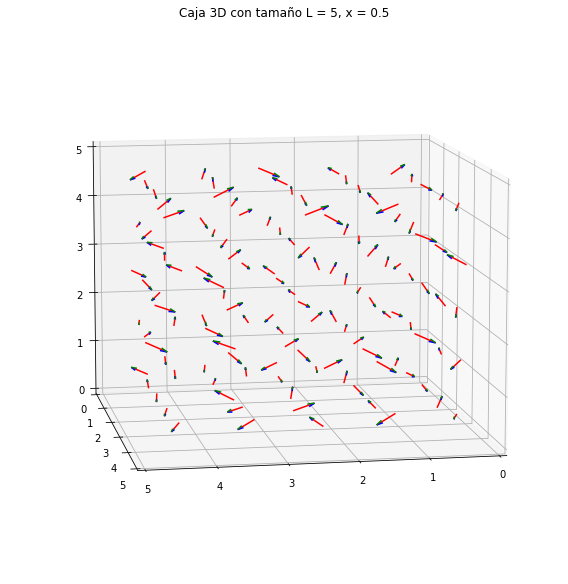

J= 0
H={ -100.0 , 100.0 }
T= 10
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


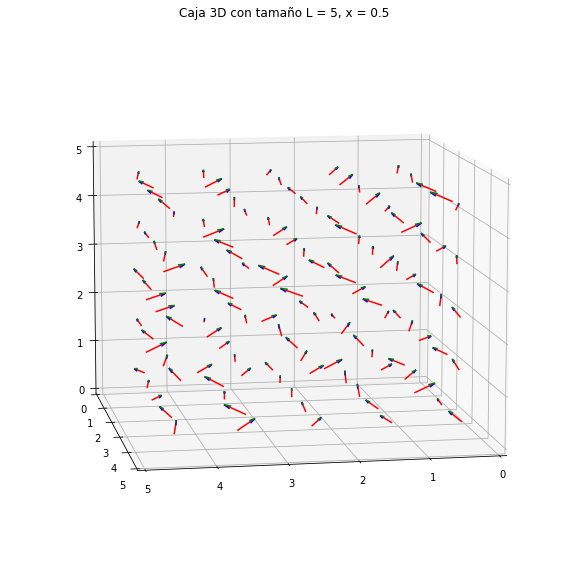

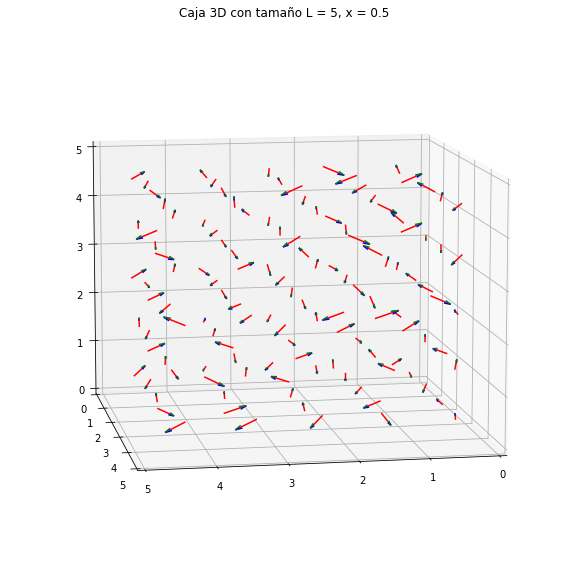

J= 0
H={ -100.0 , 100.0 }
T= 100
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


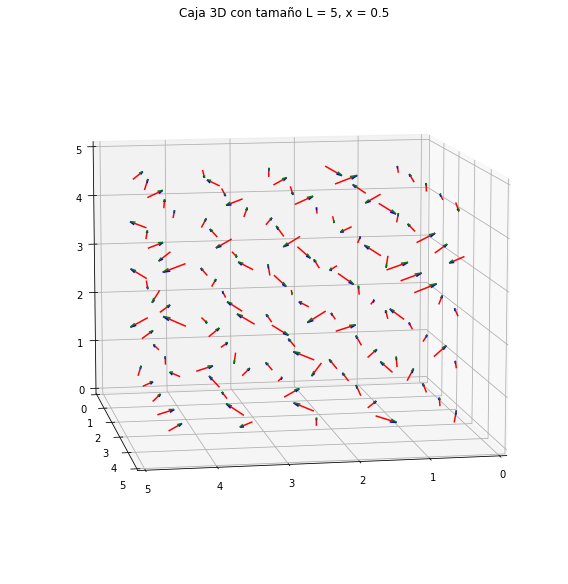

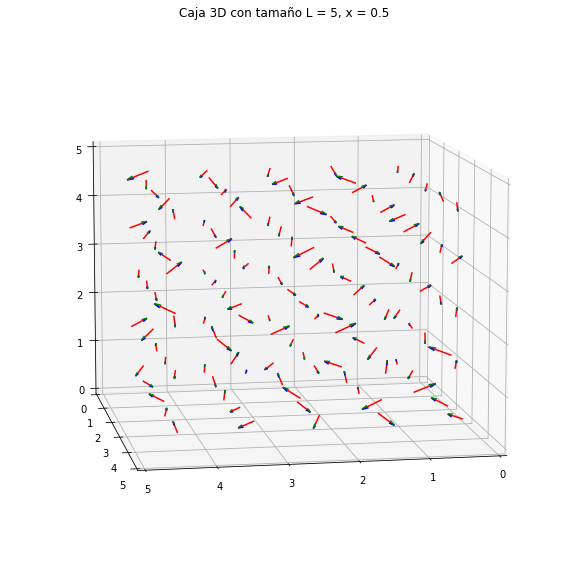

J= 0
H={ -100.0 , 100.0 }
T= 1000
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


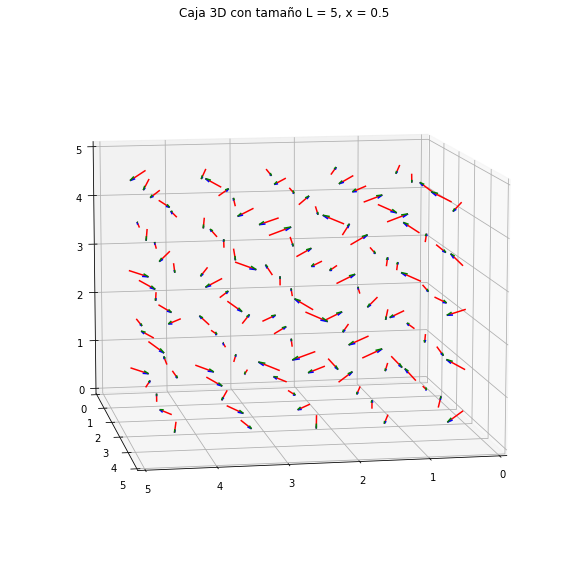

CPU times: total: 15min 5s
Wall time: 15min 9s


In [190]:
%%time
l = 5
x = 1/2
H = np.linspace(-100,100,500)
cf1,e1,m1 = main(l,x,0,H,10,'random')
cf2,e2,m2 = main(l,x,0,H,100,'random')
cf3,e3,m3 = main(l,x,0,H,1000,'random')

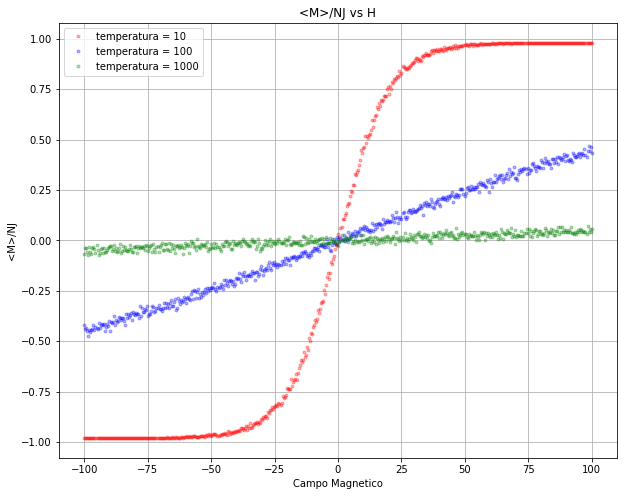

In [237]:
graph_Mp_H(5,1/2,H,[m1,m2,m3])

Se puede observar que como corresponde a la teoria, para valores muy grandes de temperatura. El sistema pierde magnetizacion por lo que si seguimos aumentando las temperaturas, eventualmente se hara una linea recta a lo largo del 0 de magnetizacion promedio.

In [292]:
%%time
l = 5
x = 5/2
H = np.linspace(-100,100,500)
cf1,e1,m1 = main(l,x,0,H,10,'random')
cf2,e2,m2 = main(l,x,0,H,100,'random')
cf3,e3,m3 = main(l,x,0,H,1000,'random')

J= 0
H={ -100.0 , 100.0 }
T= 10
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
J= 0
H={ -100.0 , 100.0 }
T= 100
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
J= 0
H={ -100.0 , 100.0 }
T= 1000
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
CPU times: total: 15min 24s
Wall time: 15min 32s


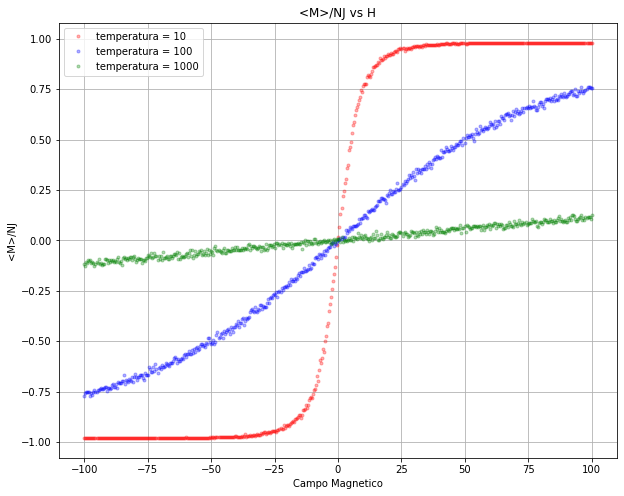

In [293]:
graph_Mp_H(5,5/2,H,[m1,m2,m3])

Se observa que para x = 5/2, es posible recuperar el mismo grafico, con la diferencia de que obtenemos menos ruido en los resultados y ademas se observa mucho mejor la tendencia de que la curva azul sigue siendo la misma funcion pero cada vez mas se pierde magnetizacion a medida que aumentamos la temperatura.

# Analisis de $\frac{<Mz>}{NJ}$ vs $H/T$ para cada valor de x, con $H \epsilon [-100,100]$ Tesla

In [240]:
def graph_Brilloui(L,x,H,Mp):
    Tl = [10,100,1000]
    q = np.linspace(-0.999,0.999,100)
    color = ['r','b','g']
    nm = (L**3)*(x)

    def brillouin(A):
        f = ((2*x+1) / 2)
        return 1.35*(1/x)*( f*np.arctanh(f*A) - (1/2)*np.arctanh(A/2) )


    plt.figure(figsize=(10,8))
    plt.title("<M>/NJ vs H/T")
    for j in range(len(Mp)):
        plt.plot(H/Tl[j],Mp[j]/nm, ".",color=color[j], alpha = 0.1, label=f"Simulacion con T = {Tl[j]}")
    plt.plot(brillouin(q),q,color="black",label=f"Teorica")

    
    plt.xlabel("Campo Magnetico")
    plt.ylabel("<M>/NJ")
    plt.legend()
    plt.grid()
    plt.show()

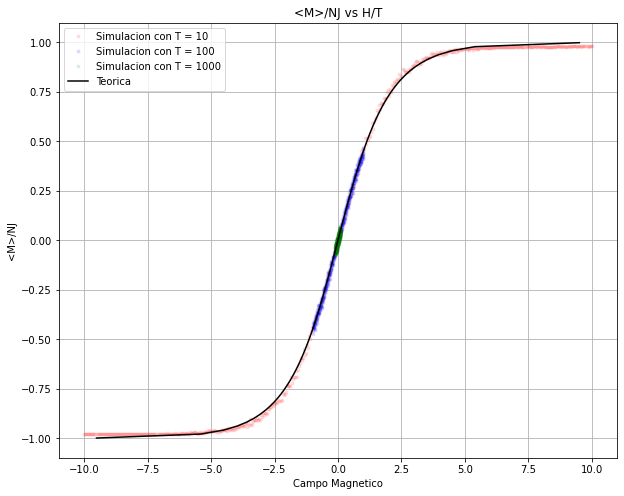

In [241]:
graph_Brilloui(5,1/2,H,[m1,m2,m3])

Podemos observar que cuando hacemos H/T, las curvas se contraen y ademas siguen la tendencia experimental de la funcion de brillouin que contiene un parametro de ajuste con valor de 1.35, este parametro hace referencia a que $\frac{<M>}{NJ} ~ B_{J}(\eta)$ entonces $\frac{<M>}{NJ} = B_{J}(\eta) c$ donde c = 1.35.

# Analisis de transiciones de fase: $\frac{<Mz>}{NJ}$ vs $T$ para cada valor de x, teniendo $T \epsilon [0.01,25]$ Kelvin

In [244]:
%%time
l = 5
T = np.linspace(25,0.01,250)
T1 = np.linspace(25,0.01,250)
T2 = np.linspace(25,0.01,250)
cf1,e1,m1t = main(l,1/2,1,0,T,'random')
cf2,e2,m2t = main(l,3/2,1,0,T1,'random')
cf2,e2,m3t = main(l,5/2,1,0,T2,'random')

J= 1
T={ 0.01 , 25.0 }
H= 0
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
J= 1
T={ 0.01 , 25.0 }
H= 0
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
J= 1
T={ 0.01 , 25.0 }
H= 0
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
CPU times: total: 7min 48s
Wall time: 7min 51s


In [287]:
def graph_Mp_T(x,T,Mp):
    color = ['r','b','g']
    
    plt.figure(figsize=(10,8))
    plt.title("<M>/NJ vs H/T")
    for j in range(len(Mp)):
        nm = (L**3)*(x[j])
        plt.plot(T,abs(Mp[j])/nm,".",color=color[j], alpha = 0.8, label=f"Simulacion con x = {x[j]}")
    plt.vlines(1.3,0,1,colors='r')
    plt.vlines(6,0,1,colors='b')
    plt.vlines(15,0,1,colors='g')
    
    
    plt.xlabel("Campo Magnetico")
    plt.ylabel("<M>/NJ")
    plt.legend()
    plt.grid()
    plt.show()

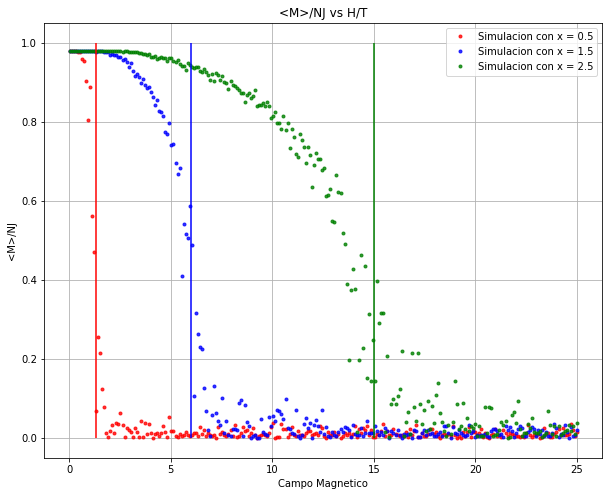

In [288]:
T = np.linspace(25,0.01,250)
graph_Mp_T([1/2,3/2,5/2],T,[m1t,m2t,m3t])

Se puede observar los cortes de los colores respectivos a cada numero cuantico de momento angular total que a medida que se hace grande este valor, se hace mas complicado determinar desde que valor empieza la temperatura critica. Lo que si se puede obtener del grafico es que aumentar el numero cuantico de momento angular total permite que el sistema se magnetice por mas tiempo a medida que se aumenta la temperatura. Algo interesante para observar es que se utilizo un rango de 0.01 a 25 kelvin, la razon de esto es que como se observa las temperaturas de corte se encuentran por debajo de los 25 grados kelvin por lo que observar temperaturas por encima de estas no es lo adecuado para estudiar el ferromagnetismo cuantico.

In [290]:
%%time
l = 8
T = np.linspace(25,0.01,250)
T1 = np.linspace(25,0.01,250)
T2 = np.linspace(25,0.01,250)
cf1,e1,m1t = main(l,1/2,1,0,T,'random')
cf2,e2,m2t = main(l,3/2,1,0,T1,'random')
cf2,e2,m3t = main(l,5/2,1,0,T2,'random')

J= 1
T={ 0.01 , 25.0 }
H= 0
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
J= 1
T={ 0.01 , 25.0 }
H= 0
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
J= 1
T={ 0.01 , 25.0 }
H= 0
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
CPU times: total: 31min 19s
Wall time: 31min 45s


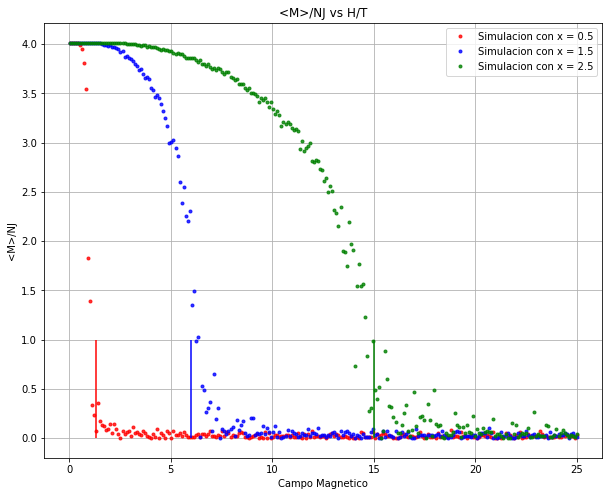

In [291]:
T = np.linspace(25,0.01,250)
graph_Mp_T([1/2,3/2,5/2],T,[m1t,m2t,m3t])

Se observa que aumentando los objetos dentro de la caja, mejora la medida para la temperatura critica.

# Analisis de formacion de Histeresis: $\frac{<Mz>}{NJ}$ vs $H$ cuando T es constante, $H \neq 0$

En este apartado se busca obtener los ciclos de histeresis. Para esto se considera el estado inicial con todos los momentos dipolares magneticos apuntando en direccion +Z como se observa en el primer grafico, luego se evoluciona para valores de campo magnetico de 100 a -100 con pasos de -0.8, luego se observa que el estado inicial cambia en el sentido que todos los momentos dipolares magneticos apuntan en direccion -Z como se observa en la segunda grafica. Ahora se vuelve a evolucionar el sistema para valores de campo magnetico de -100 a 100 con pasos de +0.8, luego vuelve a apuntar hacia +Z. 

Haciendo este ciclo bajo el mismo estado inicial, no se llego a observar histeresis por lo que posiblemente sea debido a un cambio en la temperatura necesaria para que ocurra este evento.

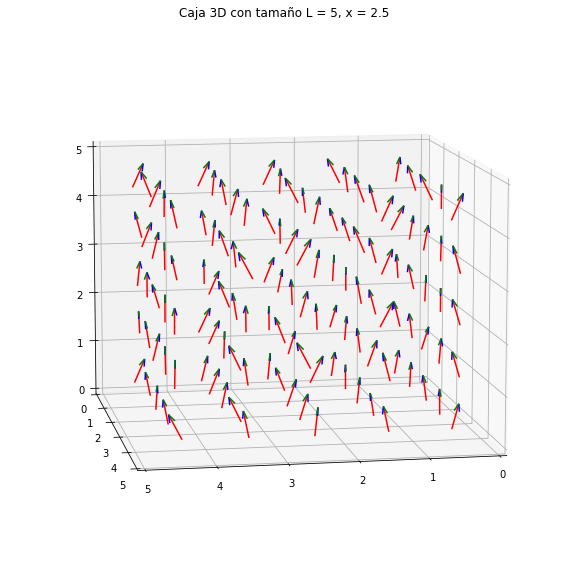

J= 1
T= 100
H={ -125.0 , 75.0 }
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


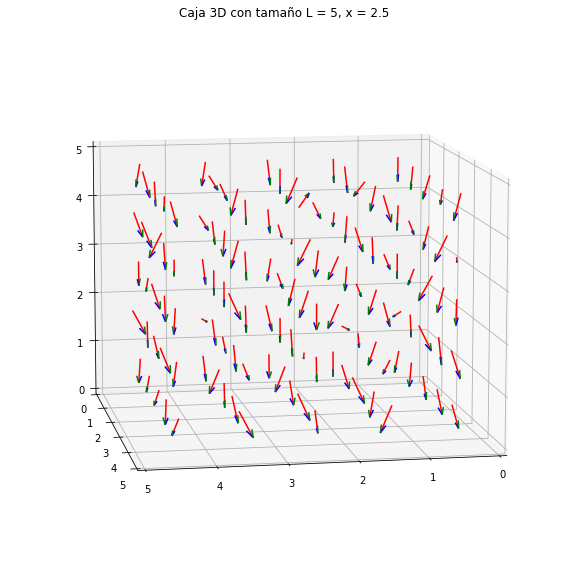

J= 1
T= 100
H={ -100.0 , 100.0 }
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


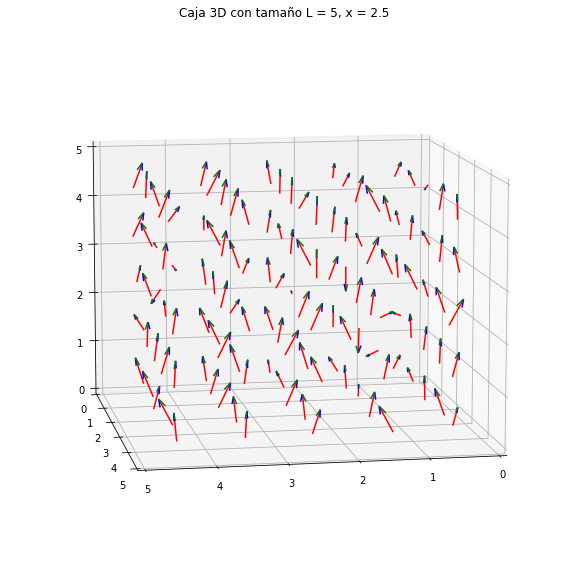

In [165]:
L = 5
x = 5/2
T = 100
m = m_numbers(x)
H1 = np.linspace(75,-125,250)
H2 = np.linspace(-100,100,250)

c0 = inicialState(L,x,'up')
graphState(c0,x)
cf,E,M = MCS_step(c0,m,2,H1,T)
graphState(cf,x)
cf2,E2,M2 = MCS_step(cf,m,2,H2,T)
graphState(cf2,x)

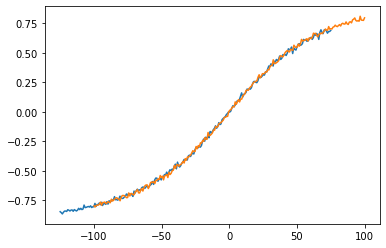

In [166]:
plt.plot(H1,np.array(M)-10/((L**3)*(5/2)))
plt.plot(H2,np.array(M2)/((L**3)*(5/2)))